## Introduction

`Name  : Ari Riscahyo Nugroho`

`Batch : 007`

`Github: Ari2109`

This notebook contains house price dataset from here:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

This notebook tried to predict the house price with given features. The model used here is Random Forest Regression with the consideration of no outlier handling with hope to preserve the information of those outlier


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

In [ ]:
pd.get_option("display.max_columns")
pd.set_option('display.max_columns', 81)

In [ ]:
train_data = pd.read_csv('train.csv')

In [ ]:
train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500,Unf,0,748,1248,GasA,TA,Y,SBrkr,1338,1296,0,2634,1,1,2,2,6,2,TA,12,Typ,0,NaN,Detchd,1969.0,Unf,4,968,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
555,556,45,RM,58.0,6380,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,5,6,1922,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,993,993,GasA,TA,Y,FuseA,1048,0,0,1048,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1922.0,Unf,1,280,TA,TA,Y,0,0,116,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,113000
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,8,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,456.0,Gd,TA,PConc,Gd,TA,No,GLQ,649,Unf,0,321,970,GasA,Ex,Y,SBrkr,983,756,0,1739,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1999.0,Fin,2,480,TA,TA,Y,115,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
375,376,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,BrkTil,Fa,Po,Gd,BLQ,350,Unf,0,333,683,GasA,Gd,N,FuseA,904,0,0,904,1,0,0,1,1,1,Fa,4,Maj1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000
611,612,80,RL,NaN,10395,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,6,6,1978,1978,Gable,CompShg,HdBoard,HdBoard,BrkFace,233.0,TA,TA,CBlock,Gd,TA,Av,ALQ,605,Unf,0,427,1032,GasA,TA,Y,SBrkr,1032,0,0,1032,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1978.0,Unf,2,564,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,Shed,500,7,2007,WD,Normal,148000


We can drop ID since it's not relevant to our model. The input will also never assume the ID input anyway

In [ ]:
train_data.drop(columns='Id', inplace=True)

Null data check!

In [ ]:
pd.DataFrame(train_data.isnull().sum()).T / train_data.shape[0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


NA Data with more than 20%:
1. Alley
2. PoolQC
3. FireplaceQu
4. Fence
5. MiscFeature

Let's see the description on each category:
1. Alley - Type of alley access
2. PoolQC - Pool quality
3. FireplaceQu - Fireplace Quality
4. Fence - Fence quality 
5. MiscFeature - $Value of miscellaneous feature

We can deduce that these columns aren't as common as the other ones:
1. Alley - this is not as common as 'Street'. Most house will have Street type but not necessarily alley
2. PoolQC - this is even rarer. The Pool part, which is also included in column, will contain 0 instead of NA if there is no pool
3. FireplaceQu - this is the same as PoolQC, although it's not as rare as pool
4. Fence - We have no data if fence is 'existing' or not, so we'll deduct that it is the same as other quality marks
5. MiscFeature - We can deduce that this is valued 0 if there's no misc. feature

So to replace the missing values, we can use 0/NA to all as they simply marked the non-existent things

## EDA

As note, we'll do the splitting early to 

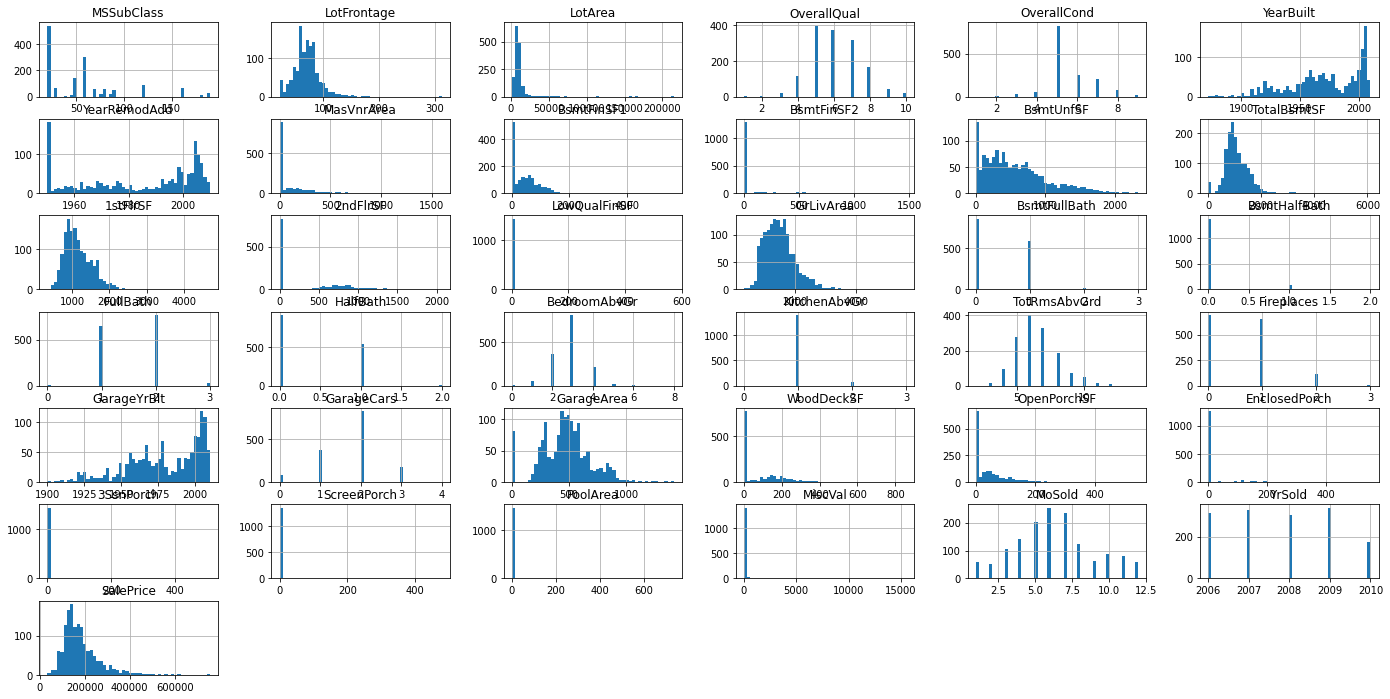

In [ ]:
train_data.hist(bins=50, figsize=(24,12))
plt.show()

Lots of skewed data, meaning that we will use median in case of imputing null data

## Pipeline Definition

In [ ]:
X = train_data.drop(columns='SalePrice')
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
house_num = X_train.select_dtypes(include=[np.number])
house_cat = X_train.drop(columns=house_num.columns.tolist())

Since we use tree-based models, we'll be using Ordinal Encoder for categorical data. To make sure that we handle unknown data correctly, we'll see how much unique values on each our categorical data have:

In [ ]:
for col in house_cat:
    print(f'{col}: ', house_cat[col].nunique())

MSZoning:  5
Street:  2
Alley:  2
LotShape:  4
LandContour:  4
Utilities:  2
LotConfig:  5
LandSlope:  3
Neighborhood:  25
Condition1:  9
Condition2:  8
BldgType:  5
HouseStyle:  8
RoofStyle:  6
RoofMatl:  7
Exterior1st:  15
Exterior2nd:  16
MasVnrType:  4
ExterQual:  4
ExterCond:  5
Foundation:  6
BsmtQual:  4
BsmtCond:  4
BsmtExposure:  4
BsmtFinType1:  6
BsmtFinType2:  6
Heating:  6
HeatingQC:  5
CentralAir:  2
Electrical:  4
KitchenQual:  4
Functional:  7
FireplaceQu:  5
GarageType:  6
GarageFinish:  3
GarageQual:  5
GarageCond:  5
PavedDrive:  3
PoolQC:  3
Fence:  4
MiscFeature:  4
SaleType:  9
SaleCondition:  6


A maximum of 25 category in Neighborhood. That means if we find unknown value in the test set, we want to encode it to 26 so that it doesn't incur the error

In [ ]:
house_cat['Neighborhood'].isnull().sum()

0

We wanted to label missing value as 'NA'. Since Neighborhood doesn't contain any null data, our OrdinalEncoder will still be handling unknown value with label 26

In [ ]:
cat_imputer = SimpleImputer(strategy="constant", fill_value='NA')
ord_enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = 26)
cat_imputer.fit(house_cat)
ord_enc.fit(house_cat)


OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=26)

In [ ]:
cat_pipeline = Pipeline([("cat_im", cat_imputer),
                         ("ord_enc", ord_enc),
                        ])

Now for the numerical data.

Since we are using tree-based model, there's no need for outlier handling. Also no need to do the scaling

There wasn't any significant null (20% or more) from numerical value, so we'll use median for the imputer since most of our data are skewed

In [ ]:
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(house_num)

SimpleImputer(strategy='median')

In [ ]:
num_pipeline = Pipeline([("num_im", num_imputer)])

Now we define the full preprocess pipeline

In [ ]:
num_attribs = list(house_num)
cat_attribs = list(house_cat)

full_prep = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

## Baseline Model (Imputed-Encoded) Check

In [ ]:
rfr_base = Pipeline([('preprocess', full_prep),
                     ('rfr', RandomForestRegressor(random_state=42))
                    ])

In [ ]:
rfr_base.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_im',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBat...
                                  

In [ ]:
y_pred_rfr_base = rfr_base.predict(X_test)
print(mse(y_test, y_pred_rfr_base, squared=False))

28606.7736813092


We got 28k in RMSE. To depict how much is this matters, let's see our actual data range

In [ ]:
print(f'Max: {y.max()}')
print(f'Min: {y.min()}')
print(f'Median: {y.median()}')


Max: 755000
Min: 34900
Median: 163000.0


From our median, the RMSE is almost 20% off. Let's see if we can improve this

## Grid Search without Feature Engineering

In [ ]:
%%time
param_grid_rfr = [
    {
      'rfr__n_estimators': [50, 100, 200, 400],
      'rfr__min_samples_split':[2, 4, 6]
    }]

grid_rfr = GridSearchCV(rfr_base, param_grid_rfr, cv=5, error_score='raise', 
                        scoring = 'neg_root_mean_squared_error', return_train_score = True, n_jobs=-1)
grid_rfr.fit(X_train, y_train)

CPU times: user 3.21 s, sys: 184 ms, total: 3.39 s
Wall time: 2min 10s


In [ ]:
base_res = pd.DataFrame(grid_rfr.cv_results_)
base_res.sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfr__min_samples_split,param_rfr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,1.845508,0.017784,0.041851,0.001329,6,100,"{'rfr__min_samples_split': 6, 'rfr__n_estimato...",-28997.278798,-34617.966546,-37229.070542,-25077.281393,-25566.208269,-30297.561110,4858.795741,1,-13990.926165,-14353.693893,-12955.783694,-13945.117158,-14217.060707,-13892.516323,491.514633
3,8.872268,0.040316,0.109198,0.003682,2,400,"{'rfr__min_samples_split': 2, 'rfr__n_estimato...",-28894.486013,-35743.594013,-36534.309022,-25197.250814,-25120.514950,-30298.030962,4966.686815,2,-11464.040148,-11151.204302,-11215.789468,-11818.808018,-11776.761041,-11485.320595,276.001804
11,7.118383,0.733633,0.091328,0.017756,6,400,"{'rfr__min_samples_split': 6, 'rfr__n_estimato...",-29031.328417,-35227.717306,-36974.767302,-25198.643684,-25271.363151,-30340.763972,4934.514369,3,-13536.197300,-13712.523761,-13133.497332,-14086.568820,-14049.879745,-13703.733392,352.049723
10,3.632248,0.023002,0.057334,0.001334,6,200,"{'rfr__min_samples_split': 6, 'rfr__n_estimato...",-28731.982963,-35180.004497,-37513.911786,-25003.138963,-25536.899767,-30393.187595,5079.647342,4,-13543.148051,-13832.309497,-13106.800432,-13999.820408,-14118.673086,-13720.150295,362.530915
7,7.798891,0.043214,0.109155,0.011221,4,400,"{'rfr__min_samples_split': 4, 'rfr__n_estimato...",-29256.936715,-35498.710081,-36922.413960,-25481.159501,-25225.418812,-30476.927814,4915.018106,5,-12346.964753,-12384.191522,-12206.267806,-13088.005676,-12728.831774,-12550.852306,318.840042


In [ ]:
y_pred_grid = grid_rfr.predict(X_test)
print(mse(y_test, y_pred_grid, squared=False))

28535.368416808105


## Baseline Model WITH Feature Selection

### RFE Feature Selection

Now we try to lower our dimension. We'll use RFE to help with our feature selection here. First, we'll check again how much features our data have

In [ ]:
X_train.shape

(1168, 79)

We have 79 features. We'll try to reduce this features to 15 and 35 with 4 features to delete per step, then see which one is the best 

In [ ]:
rfe_selector_35 = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select = 35, step = 4)
rfr_base_rfe35 = Pipeline([('preprocess', full_prep),
                         ('rfe', rfe_selector_35),
                     ('rfr', RandomForestRegressor(random_state=42))
                    ])
rfr_base_rfe35.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_im',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBat...
                                  

In [ ]:
y_pred_rfr_rfe35 = rfr_base_rfe35.predict(X_test)
print(mse(y_test, y_pred_rfr_rfe35, squared=False))

28155.618531975517


In [ ]:
rfe_selector_35.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  1,  1,  1,  1, 11,  1,  4,
       10,  1,  5,  2,  6,  1,  1,  1,  1,  1,  1,  1,  6,  9,  1,  4, 12,
        1,  2,  1, 12, 10,  1,  2, 12,  5,  5,  1,  6, 11,  9,  8,  3, 11,
        3,  3,  4,  1,  9,  7,  1,  8,  1,  2,  7, 10,  5,  1, 10,  1,  7,
        1,  1,  3,  4,  8,  9, 12,  6, 11,  7,  1])

In [ ]:
rfe_selector_15 = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select = 15, step = 4)
rfr_base_rfe15 = Pipeline([('preprocess', full_prep),
                         ('rfe', rfe_selector_15),
                     ('rfr', RandomForestRegressor(random_state=42))
                    ])
rfr_base_rfe15.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_im',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBat...
                                  

In [ ]:
y_pred_rfr_rfe15 = rfr_base_rfe15.predict(X_test)
print(mse(y_test, y_pred_rfr_rfe15, squared=False))

28174.611301733956


## Grid Search WITH Feature Selection

### RFE Feature Selection

Now we'll do GridSearch and selecting features with RFE. 

In [ ]:
%%time 
#this code took about 23 minutes on Google Colab. Run with caution
param_grid_rfr_rfe = [
    {
      'rfr__n_estimators': [100, 400],
      'rfr__min_samples_split':[2, 6],
      'rfe__n_features_to_select':[35, 23, 15, 7]
    }]

grid_rfr_rfe = GridSearchCV(rfr_base_rfe35, param_grid_rfr_rfe, cv=5, error_score='raise', 
                        scoring = 'neg_root_mean_squared_error', return_train_score = True, n_jobs=-1)
grid_rfr_rfe.fit(X_train, y_train)

CPU times: user 30.7 s, sys: 949 ms, total: 31.7 s
Wall time: 22min 6s


In [ ]:
gridfe_res = pd.DataFrame(grid_rfr_rfe.cv_results_)
gridfe_res.sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfe__n_features_to_select,param_rfr__min_samples_split,param_rfr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.494010,0.415788,0.047856,0.006460,35,2,100,"{'rfe__n_features_to_select': 35, 'rfr__min_sa...",-27955.386444,-34837.582051,-37678.718094,-24825.848329,-25494.431999,-30158.393383,5167.047561,1,-11943.036763,-11914.777864,-11082.353407,-11921.424795,-12105.432270,-11793.405020,362.343894
1,31.615758,0.503190,0.110198,0.005287,35,2,400,"{'rfe__n_features_to_select': 35, 'rfr__min_sa...",-28359.382943,-35875.103022,-36774.860159,-25127.156755,-25242.893783,-30275.879332,5081.364066,2,-11417.365452,-11162.446393,-11075.060306,-11735.802752,-11703.175166,-11418.770014,270.272523
3,29.849108,0.206390,0.103107,0.008451,35,6,400,"{'rfe__n_features_to_select': 35, 'rfr__min_sa...",-29258.684269,-35069.869233,-37152.100556,-25238.430912,-25251.433795,-30394.103753,4936.608102,3,-13453.348134,-13684.020694,-13113.941427,-14169.729188,-14011.377321,-13686.483353,379.801259
11,34.960279,0.348312,0.103382,0.003495,15,6,400,"{'rfe__n_features_to_select': 15, 'rfr__min_sa...",-26874.959089,-36913.100866,-35961.025177,-26104.661961,-26143.234698,-30399.396358,4946.541726,4,-14004.603410,-14027.506760,-13791.415121,-14336.927438,-14467.682408,-14125.627027,243.976084
6,30.004619,0.251357,0.041756,0.003080,23,6,100,"{'rfe__n_features_to_select': 23, 'rfr__min_sa...",-29229.288335,-34808.285295,-36575.133183,-25354.257244,-26038.006697,-30400.994151,4548.017490,5,-14172.029359,-14377.274673,-13161.685239,-14350.657802,-14164.063726,-14045.142160,450.419947


The best result from this GridSearch is 35 features selected, 2 samples split, 100 estimators.

In [ ]:
y_pred_rfr_rfe_grid = grid_rfr_rfe.predict(X_test)
print(mse(y_test, y_pred_rfr_rfe_grid, squared=False))

28155.618531975517


The result is the same as before, so we seems to hit the 'good' for now

## Overall Result

Our result so far are as follows:

In [ ]:
print(f'RMSE Basemodel: {mse(y_test, y_pred_rfr_base, squared=False)}')
print(f'RMSE Basemodel with Grid Search: {mse(y_test, y_pred_grid, squared=False)}')
print(f'RMSE Basemodel with Feature Selection: {mse(y_test, y_pred_rfr_rfe35, squared=False)}')
print(f'RMSE Basemodel with Feature Selection and Grid Search: {mse(y_test, y_pred_rfr_rfe_grid, squared=False)}')

RMSE Basemodel: 28606.7736813092
RMSE Basemodel with Grid Search: 28535.368416808105
RMSE Basemodel with Feature Selection: 28155.618531975517
RMSE Basemodel with Feature Selection and Grid Search: 28155.618531975517


While there's improvement, but it is just a little. Our best model is using RFE to cut the features down to 35, with the RandomForestRegressor using 100 n_estimators and 2 minimum samples to split

We'll build this model to be kept later on

In [ ]:
rfe_selector_35 = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select = 35, step = 4)
rfr_best = Pipeline([('preprocess', full_prep),
                     ('rfe', rfe_selector_35),
                     ('rfr', RandomForestRegressor(random_state=42, n_estimators=100, min_samples_split = 2))
                    ])
rfr_best.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_im',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBat...
                                  

## Model Inference

### Inference without user input (inputting all features)

We'll try to predict the house price using this model. First we'll take one house as an example

In [ ]:
infer_test = pd.DataFrame(X_test.iloc[42]).T
infer_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1101,20,RL,61.0,9758,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1971,1971,Gable,CompShg,HdBoard,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,412,LwQ,287,251,950,GasA,TA,Y,SBrkr,950,0,0,950,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1981.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


Some notable features from this house:
1. SubClass: 1-STORY 1946 & NEWER ALL STYLES
2. Low Density Residential (RL)
3. 9758 sqft Lot Area
4. Paved Street from street to home
5. No Alley
6. Flat Contour LAnd
7. North Ames Neighborhood
8. One Story House
9. No Remodeling since 1971
10. Gable Roof Style with Composite Shingle material
11. Gas Air Furnace Heating
12. Standard Breaker Circuit
13. 1 Full Bathroom
14. 3 Bedroom above Basement
15. 5 Rooms above Basement
16. No Fireplace
17. Unfinished Garage Detached from Home
18. No Pool, No Fence, No Miscellanous Stuff
19. Sold Normally

In [ ]:
rfr_best.predict(infer_test)

array([120634.33])

The model predicted that the house cost $120,634.33 

### Inference with user input (input with few features and median/mode the others)

Since we have so many features here, we cannot really ask the customer all of these, so we'll include some of familiar features for the customer and taking the median (for numerical) or mode (for categorical) for the rest of the data

In [ ]:
median_data_num = pd.DataFrame(house_num.median()).T
mode_data_cat = pd.DataFrame(house_cat.mode().iloc[0]).T
input_infer = pd.concat([median_data_num, mode_data_cat], axis=1)

In [ ]:
input_infer

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,50.0,70.0,9600.0,6.0,5.0,1972.0,1994.0,0.0,384.5,0.0,480.0,997.5,1095.0,0.0,0.0,1473.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,482.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal


Let's say that we wanted to take Lot Area, Number of Rooms, Bedrooms, Bathrooms, and Pool

Suppose our customers wanted to have house with 10000 sqft, 8 rooms, 4 bedrooms, 2 bathrooms, a kitchen, hence we got:

In [ ]:
input_infer['LotArea'] = 10000
input_infer['TotRmsAbvGrd'] = 8
input_infer['BedroomAbvGrd'] = 4
input_infer['FullBath'] = 2
input_infer['KitchenAbvGrd'] = 1

In [ ]:
rfr_best.predict(input_infer)

array([167552.4])

Our model predicted that the price will be around $167,552.4 

## General Conclusion:

1. Most of the data are skewed, indicating outliers, hence tree-based models is suitable to try to preserve the value
2. After few experiments, our model didn't improve well in terms of the RMSE. There's improvement, but just a little
3. Further feature engineering, such as 'manually' picking the relevant feature (and not by machine learning) or feature enrichment might result in much better result than the simple method
4. The experiment might be tried with other model to compare the result

## Saving the Model and the 'Median Data'

In [ ]:
import pickle
with open("house_model.pkl", "wb") as model_file:
  pickle.dump(rfr_best, model_file)

In [ ]:
median_data_num = pd.DataFrame(house_num.median()).T
mode_data_cat = pd.DataFrame(house_cat.mode().iloc[0]).T
input_infer = pd.concat([median_data_num, mode_data_cat], axis=1)
input_infer.to_csv('base_input.csv')